In [146]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
#Bring in pre-processed data
X_train = pd.read_csv("data/X_train_preproc.csv")
y_train = pd.read_csv("data/y_train_preproc.csv")
X_test  = pd.read_csv("data/X_test_preproc.csv")
y_test  = pd.read_csv("data/y_test_preproc.csv")

In [147]:
from sklearn import svm
clf = svm.SVC()
clf.fit( X_train, np.ravel(y_train) )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
#Test set accuracy
clf.score(X_test, np.ravel(y_test))

0.92307692307692313

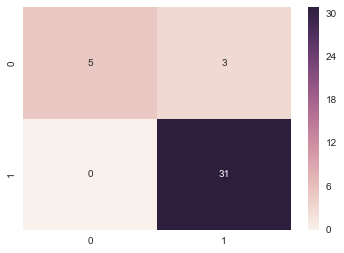

In [149]:
#Test set confusion.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True)

In [150]:
#Cross validation performance.
from sklearn import cross_validation
clf = svm.SVC()
scores = cross_validation.cross_val_score(clf, X_train, np.ravel(y_train), cv=10)
scores

array([ 0.96083551,  0.94516971,  0.94764398,  0.94502618,  0.94502618,
        0.93193717,  0.94240838,  0.94502618,  0.95287958,  0.95013123])

In [151]:
"Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

'Accuracy: 0.9466 (+/- 0.01)'

In [119]:
#All possible hyperparameters
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [120]:
from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
# When included, didn't finish running for long time 
#{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 10, 50, 100, 1000]}]

scores = ['precision', 'recall']



In [121]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, n_jobs=4,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, np.ravel(y_train))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.940 (+/-0.018) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.932 (+/-0.025) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.915 (+/-0.019) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.602 (+/-0.003) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.938 (+/-0.015) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.939 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.022) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.916 (+/-0.018) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.932 (+/-0.023) for {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
0.941 (+/-0.020) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.938 (+/-0.022) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.927 (+/-0.014) for {'C': 50, 'gamma': 1e-05, 'kernel': 'rbf'}
0.930 (+/-0.022) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.940 (

/Users/tu/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tu/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tu/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tu/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tu/anaconda/lib/python3.4/sit

Best parameters set found on development set:

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.939 (+/-0.018) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.930 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.908 (+/-0.017) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.776 (+/-0.002) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.937 (+/-0.015) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.938 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.930 (+/-0.024) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.909 (+/-0.016) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.932 (+/-0.022) for {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
0.940 (+/-0.018) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.936 (+/-0.022) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.923 (+/-0.015) for {'C': 50, 'gamma': 1e-05, 'kernel': 'rbf'}
0.931 (+/-0.021) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.939 (+/-0.021) for {'C': 100, 'gamma': 0.001, 